In [8]:
import pandas as pd, numpy as np
%matplotlib inline

In [2]:
scores = np.array([26,58,43,23,37,45,57,48,63,58,35,39,35,51,68,36,39,27,31,48,45,63,33,61,57,16,54,61,41,72])

In [27]:
scores = pd.DataFrame(scores)

In [28]:
scores.describe()

,0
count,30.000000
mean,45.666667
std,14.327050
min,16.000000
25%,35.250000
50%,45.000000
75%,57.750000
max,72.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119534a58>]],
      dtype=object)

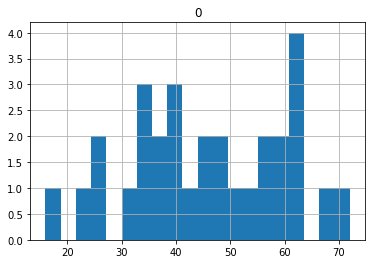

In [29]:
scores.hist(bins=20)

I want a curve that places the average (45) in 70, the top (72) in 90, and it is convex—to prevent low scores from passing this test.  Ideally, anything under 30 should fail.  These are the three interpolation points:

| raw | curved |
|-----|--------|
| 72 | 90 |
| 45 | 70 |
| 30 | 45 |

In [15]:
import scipy

In [33]:
scores['curved'] = scores.apply(lambda x: np.round(scipy.interp(x,[0,30,45,72,100], [0,45,70,90,100])),0)

In [34]:
scores

,0,curved
0,26,39.0
1,58,80.0
2,43,67.0
3,23,34.0
4,37,57.0
5,45,70.0
6,57,79.0
7,48,72.0
8,63,83.0
9,58,80.0


In [35]:
import matplotlib.pyplot as plt

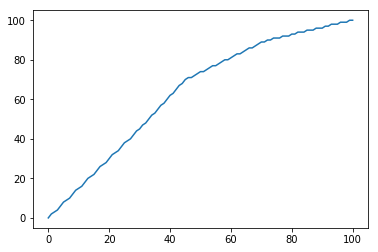

In [38]:
plt.plot(np.linspace(0,100,101), np.round(scipy.interp(np.linspace(0,100,101),[0,30,45,72,100], [0,45,70,90,100])),0)